In [44]:
import pandas as pd
import numpy as np
import random

In [43]:
from matplotlib import pyplot as plt

In [14]:
padshape = 16

In [60]:
target_lab = "label"

pdg_lab = "inTpPdgId"

headLab = ["run","evt","lumi","bSX","bSY","bSZ","bSdZ"]

particle = ["TId","Px","Py","Pz","Pt","MT","ET","MSqr","PdgId",
                "Charge","NTrackerHits","NTrackerLayers","Phi","Eta","Rapidity",
                "VX","VY","VZ","DXY","DZ","BunchCrossing","IsChargeMatched",
                "IsSigSimMatched","SharedFraction","NumAssocRecoTracks"]



hitCoord = ["X","Y","Z","Phi","R"] #5

hitDet = ["IsBarrel","Layer","Ladder","Side","Disk","Panel","Module"]#,"IsFlipped","Ax1","Ax2"] #12

hitClust = ["ClustX","ClustY","ClustSize","ClustSizeX","ClustSizeY","PixelZero",
            "AvgCharge","OverFlowX","OverFlowY","Skew","IsBig","IsBad","IsEdge"] #13

hitPixel = ["Pix" + str(el) for el in range(1, padshape*padshape + 1)]

hitCharge = ["SumADC"]

hitLabs = hitCoord + hitDet + hitClust + hitPixel + hitCharge
hitsLabs = []

for j in range(10):
    hitsLabs.append(["hit_" + str(j) + "_" + str(i) for i in hitLabs])

hitPixels = []
for j in range(10):
    hitPixels.append(["hit_" + str(j) + "_" + str(i) for i in  hitPixel])
    
hitCoords = []
for j in range(10):
    hitCoords.append(["hit_" + str(j) + "_" + str(i) for i in  hitCoord])

hitFeatures = hitCoord + hitDet + hitClust + hitCharge # 5 + 12 + 13 + 1 = 31
hitsFeatures = []

for j in range(10):
    hitsFeatures.append(["hit_" + str(j) + "_" + str(i) for i in hitFeatures])

hitDets = []

for j in range(10):
    hitDets.append(["hit_" + str(j) + "_" + str(i) for i in hitDet])


#featureLabs = inHitFeature + outHitFeature + differences

dataLab = headLab 

dataLab += particle 

for j in range(10):
    dataLab += hitsLabs[j]

dataLab += ["dummyFlag"]

layer_ids = [0, 1, 2, 3, 14, 15, 16, 29, 30, 31]

particle_ids = [-1.,11.,13.,15.,22.,111.,211.,311.,321.,2212.,2112.,3122.,223.]

main_pdgs = [11.,13.,211.,321.,2212.]

layer_ids = [0, 1, 2, 3, 14, 15, 16, 29, 30, 31]

particle_ids = [-1.,11.,13.,15.,22.,111.,211.,311.,321.,2212.,2112.,3122.,223.]

main_pdgs = [11.,13.,211.,321.,2212.]

In [10]:
path = "./samples/"
d = "2_30_Apr18_cnn_tracks_00.txt"
dfTracks = 0
dfDoublets = 0
with open(path + d, 'rb') as df:
    dfTracks = pd.read_table(df, sep="\t", header = None)

In [11]:
dfTracks.head()

,0,1,2,3,4,5,6,7,8,9,...,2843,2844,2845,2846,2847,2848,2849,2850,2851,2852
0,1,10,1,-0.024794,0.069286,0.789895,3.4978,0,-135.4660,-61.64600,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137
1,1,10,1,-0.024794,0.069286,0.789895,3.4978,1,-17.9226,-9.57021,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137
2,1,10,1,-0.024794,0.069286,0.789895,3.4978,2,-556.8990,-425.42800,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137
3,1,10,1,-0.024794,0.069286,0.789895,3.4978,3,-440.7360,-716.69000,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137
4,1,10,1,-0.024794,0.069286,0.789895,3.4978,4,38.9291,-361.20800,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137


In [27]:
print(len(dataLab))
#print(dataLab)
print(len(hitLabs)-256)

2853
26


In [39]:
dfTracks.columns = dataLab

In [40]:
dfTracks[hitCoords[0]].head()

,hit_0_X,hit_0_Y,hit_0_Z,hit_0_Phi,hit_0_R
0,-2.833610,-1.20714,3.80100,-2.73887,3.08002
1,-2.780240,-1.39430,3.41131,-2.67674,3.11028
2,-2.252600,-1.63111,1.78253,-2.51487,2.78113
3,-1.511340,-2.34875,9.04818,-2.14256,2.79298
4,0.280147,-2.76784,9.73479,-1.46992,2.78198


In [41]:
dfTracks.head()

,run,evt,lumi,bSX,bSY,bSZ,bSdZ,TId,Px,Py,...,hit_9_Pix249,hit_9_Pix250,hit_9_Pix251,hit_9_Pix252,hit_9_Pix253,hit_9_Pix254,hit_9_Pix255,hit_9_Pix256,hit_9_SumADC,dummyFlag
0,1,10,1,-0.024794,0.069286,0.789895,3.4978,0,-135.4660,-61.64600,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137
1,1,10,1,-0.024794,0.069286,0.789895,3.4978,1,-17.9226,-9.57021,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137
2,1,10,1,-0.024794,0.069286,0.789895,3.4978,2,-556.8990,-425.42800,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137
3,1,10,1,-0.024794,0.069286,0.789895,3.4978,3,-440.7360,-716.69000,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137
4,1,10,1,-0.024794,0.069286,0.789895,3.4978,4,38.9291,-361.20800,...,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,542.137


In [42]:
dfTracks[hitPixels[0]].head()

,hit_0_Pix1,hit_0_Pix2,hit_0_Pix3,hit_0_Pix4,hit_0_Pix5,hit_0_Pix6,hit_0_Pix7,hit_0_Pix8,hit_0_Pix9,hit_0_Pix10,...,hit_0_Pix247,hit_0_Pix248,hit_0_Pix249,hit_0_Pix250,hit_0_Pix251,hit_0_Pix252,hit_0_Pix253,hit_0_Pix254,hit_0_Pix255,hit_0_Pix256
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


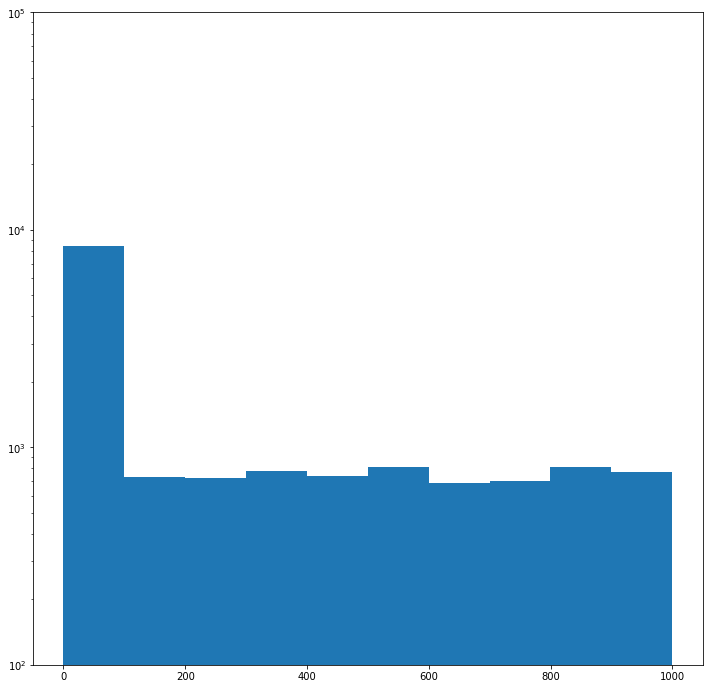

15158


In [84]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==211.0) & (dfTracks["SharedFraction"] == 1.0)]["Pt"].values,log=True)
plt.ylim(100,1e5)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==211.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

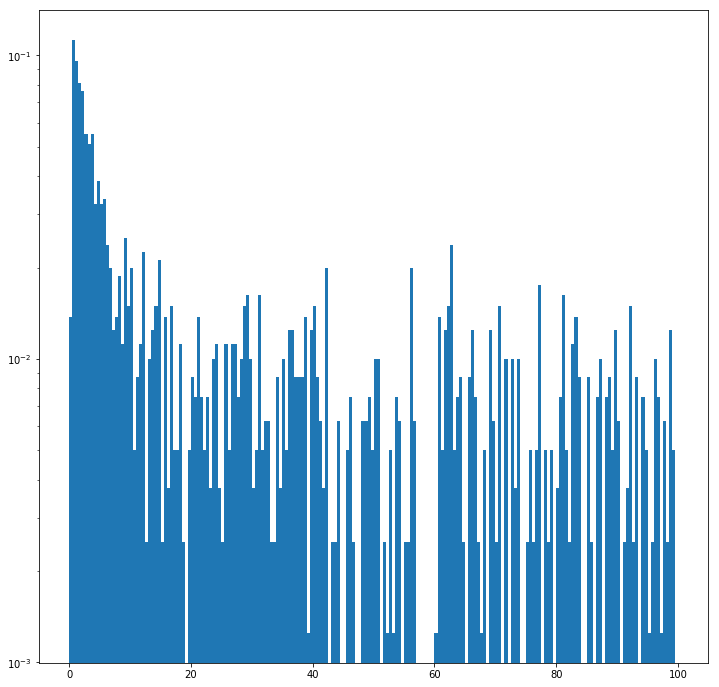

8100


In [118]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)]["Pt"].values,log=True,range=[0.0,100], bins=200,normed=True)
#plt.ylim(10,1e2)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

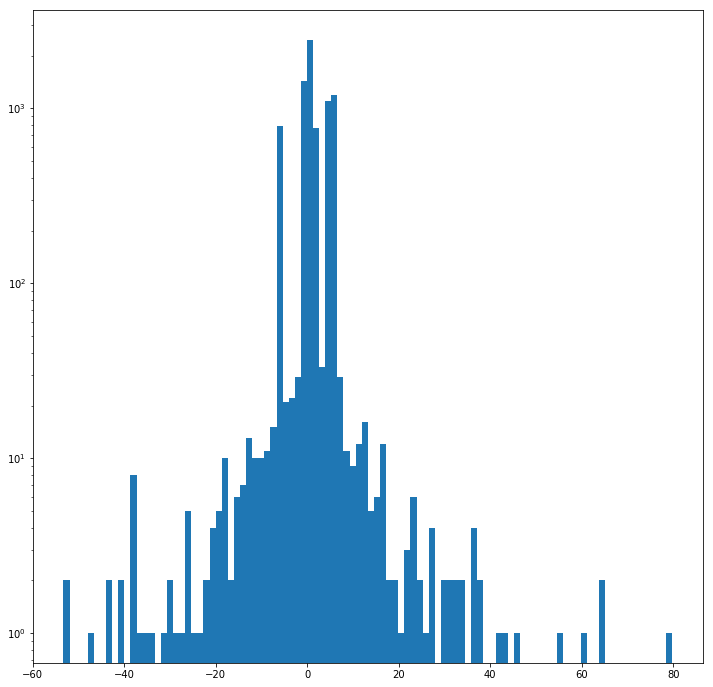

8100


In [87]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==211.0) & (dfTracks["SharedFraction"] == 1.0)]["DZ"].values,log=True,bins=100)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==211.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

In [114]:
ptrRanges = []
for i in range(20):
    ptrRanges.append([i*50.0,(i+1)*50])
print(ptrRanges)

[[0.0, 50], [50.0, 100], [100.0, 150], [150.0, 200], [200.0, 250], [250.0, 300], [300.0, 350], [350.0, 400], [400.0, 450], [450.0, 500], [500.0, 550], [550.0, 600], [600.0, 650], [650.0, 700], [700.0, 750], [750.0, 800], [800.0, 850], [850.0, 900], [900.0, 950], [950.0, 1000]]


In [ ]:
numMin = 9999999
for r in ptrRanges:
    
    numMin = min(numMin,(dfTracks[dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)]["Pt"])

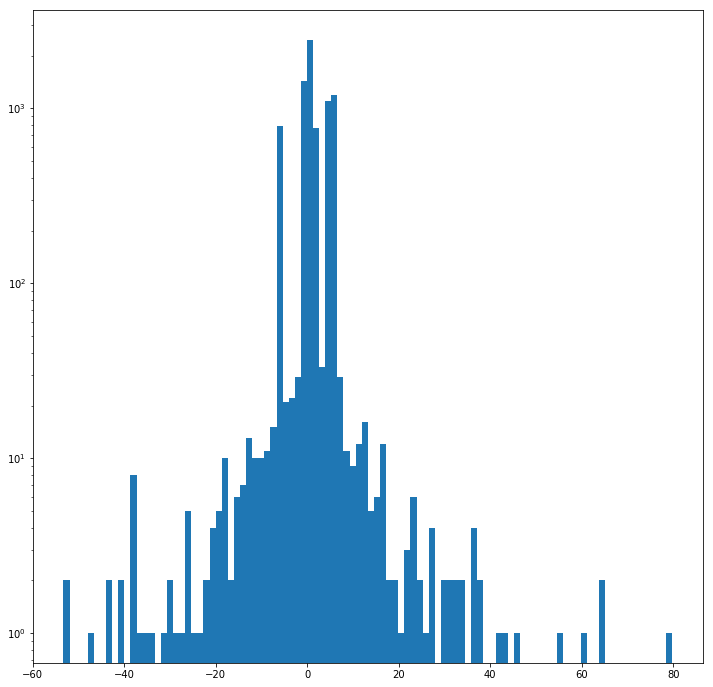

8100


In [88]:
plt.figure(figsize=(12,12))
plt.hist(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)]["DZ"].values,log=True,bins=100)
plt.show()
print(dfTracks[(dfTracks["PdgId"].abs()==321.0) & (dfTracks["SharedFraction"] == 1.0)].shape[0])

In [75]:
dfTracks["PdgId"].value_counts()

-211     7607
 211     7551
 321     4129
-321     3971
 2212     600
-11       537
 11       496
-2212      82
-13        12
 13         6
 3222       3
 3112       2
-3312       2
-3222       1
-3112       1
Name: PdgId, dtype: int64

0
[   1.    0.  160.   -1.   -1.   -1.    5.]


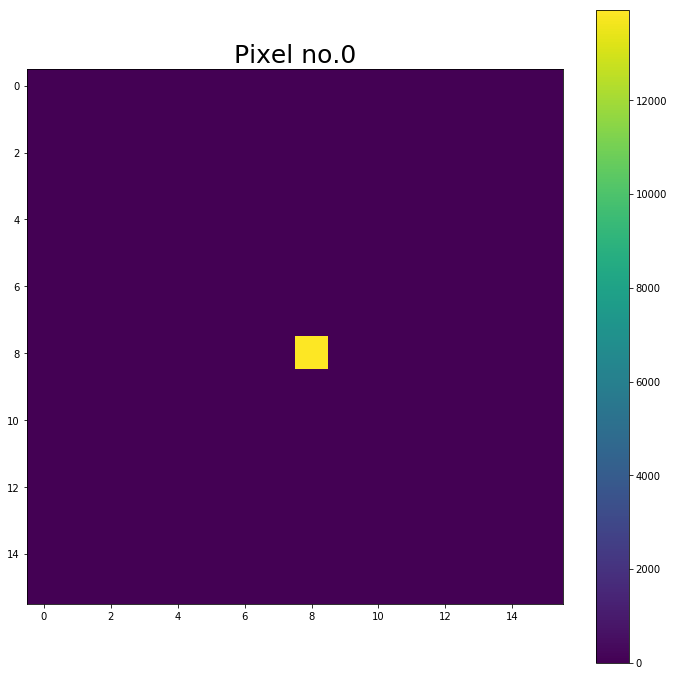

[   1.    0.  144.   -1.   -1.   -1.    5.]


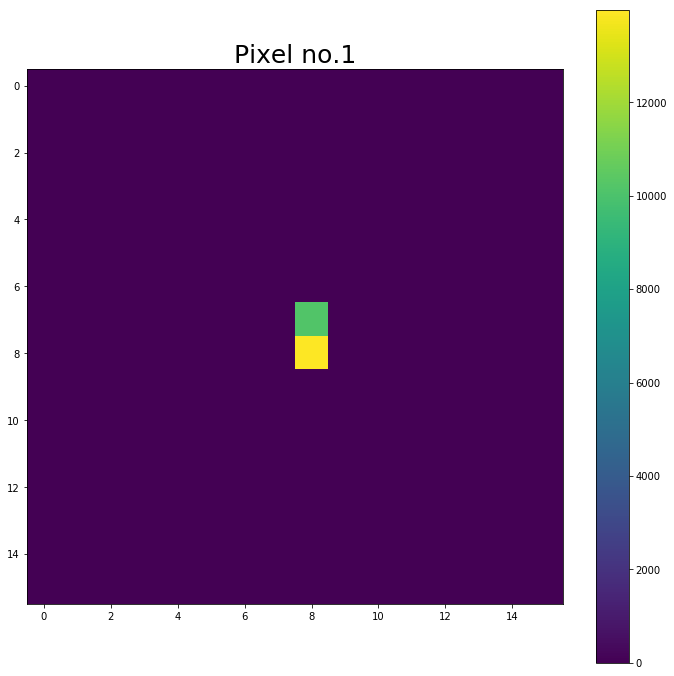

[  1.   1.  80.  -1.  -1.  -1.   5.]


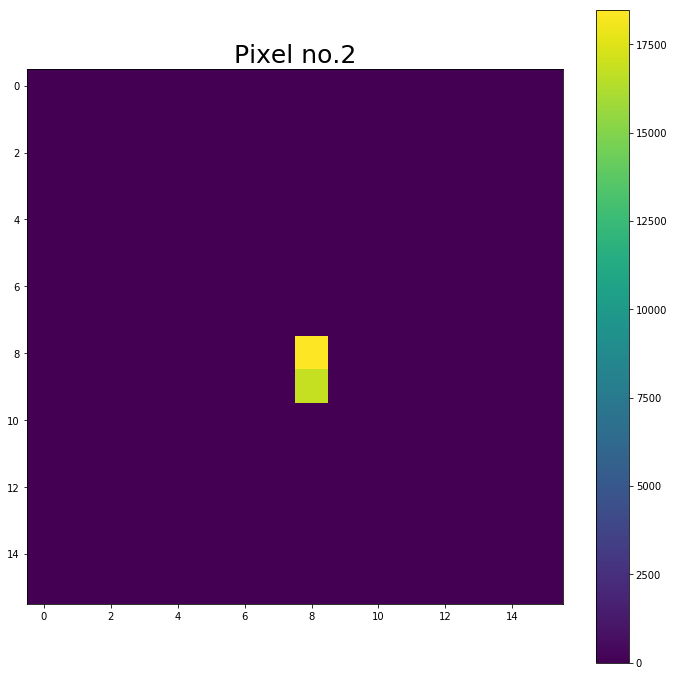

[  1.   2.  32.  -1.  -1.  -1.   4.]


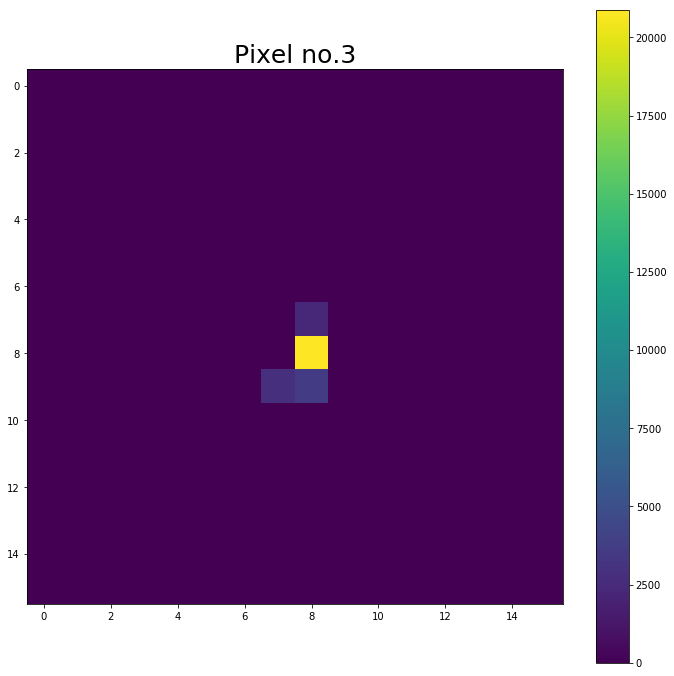

[  1.   2.  16.  -1.  -1.  -1.   4.]


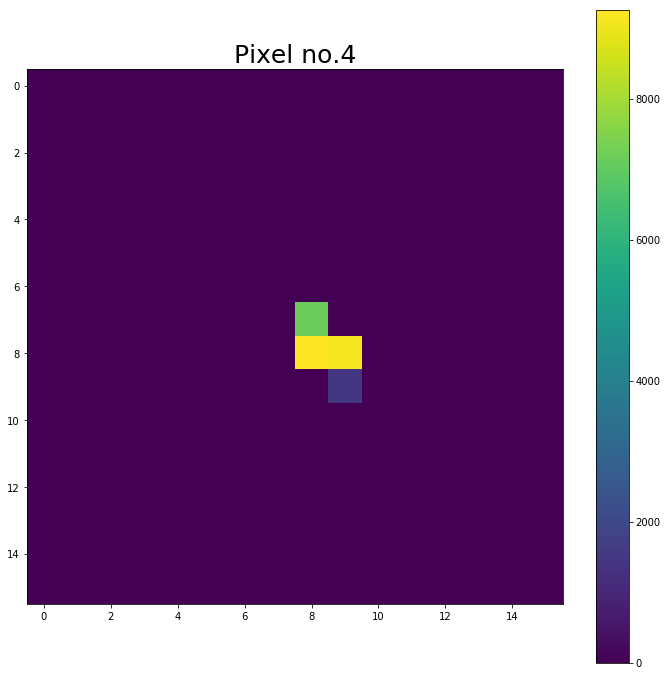

[  1.   3.  16.  -1.  -1.  -1.   4.]


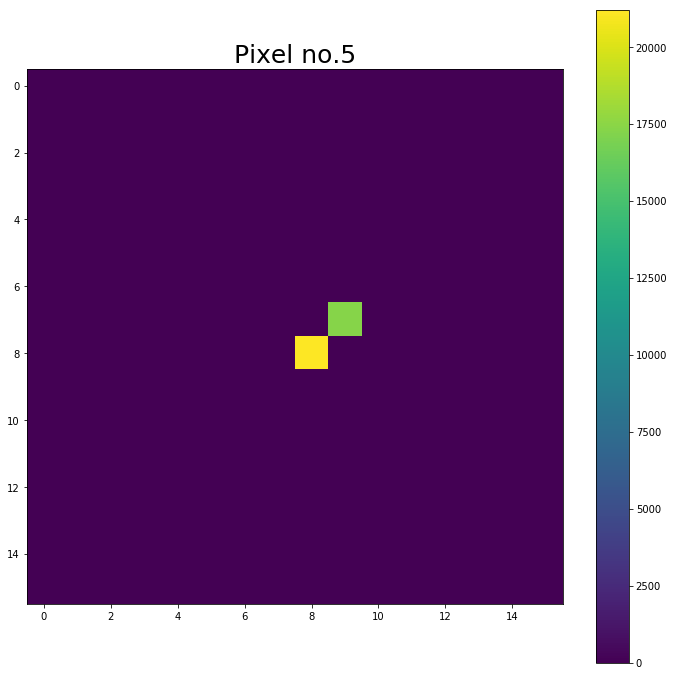

[ 1.  3.  0. -1. -1. -1.  4.]


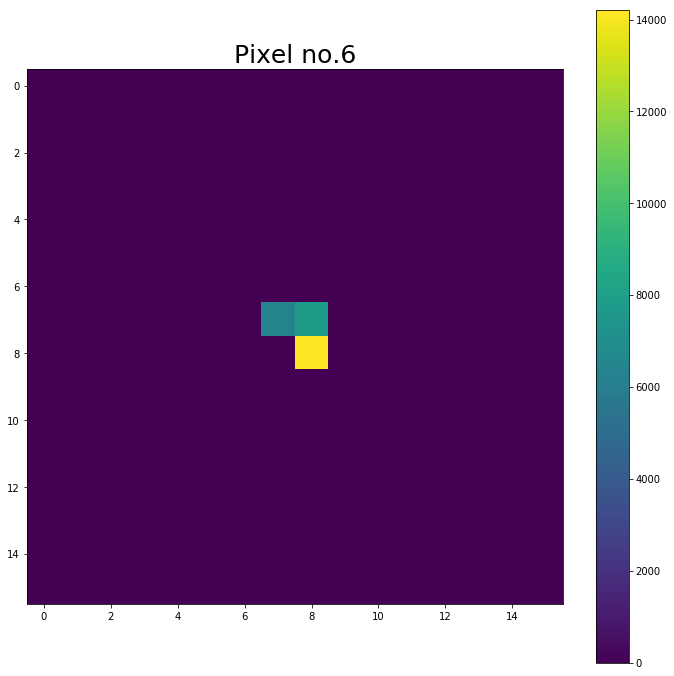

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]


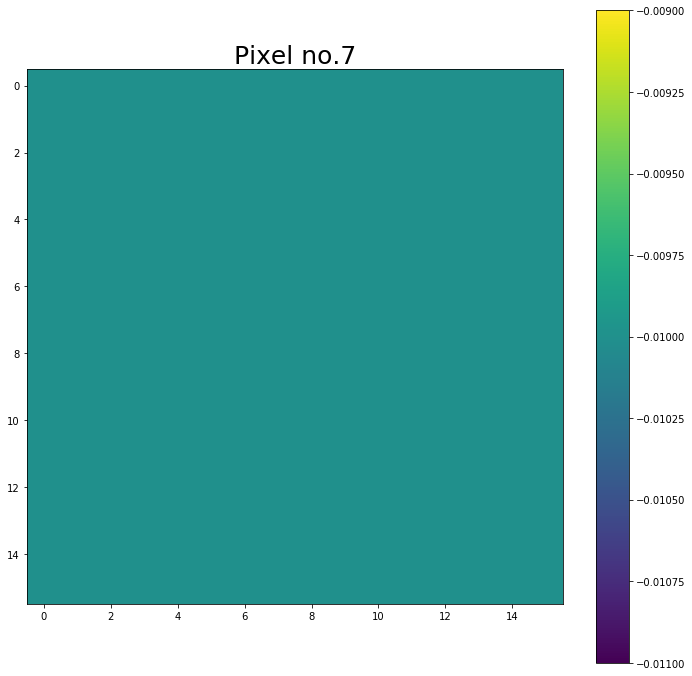

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]


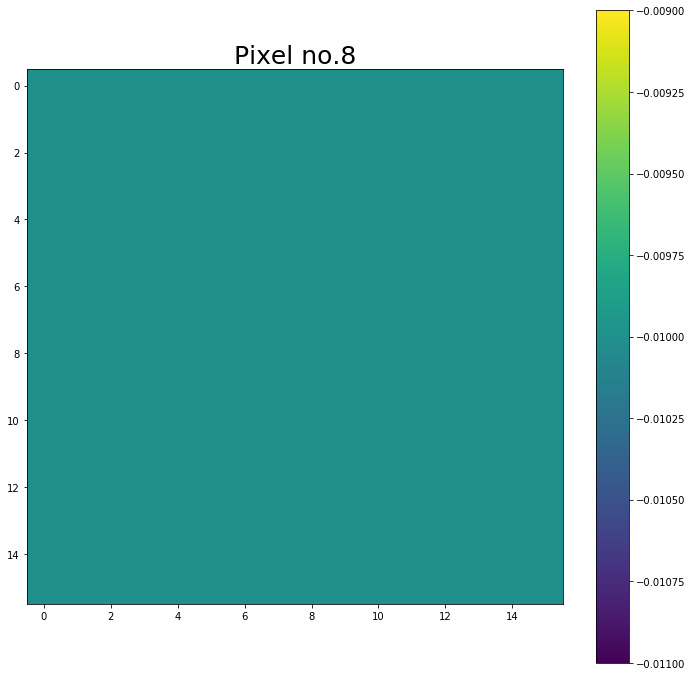

[-0.01 -0.01 -0.01 -0.01 -0.01 -0.01 -0.01]


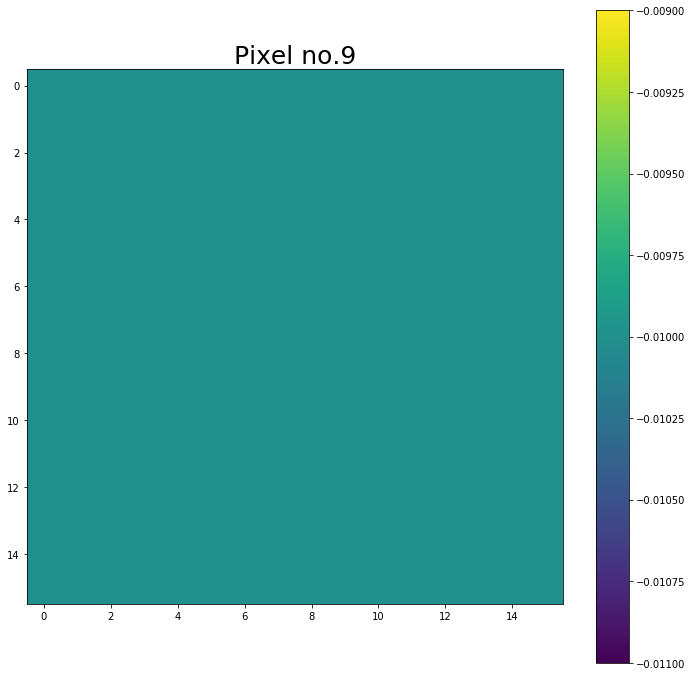

In [117]:
u = int(random.uniform(0,dfTracks[dfTracks["hit_6_IsBarrel"]>0.0].shape[0]))
print u

for i in range(10):
    plt.figure(figsize=(12,12))
    print(dfTracks[dfTracks["hit_6_IsBarrel"]>0.0][hitDets[i]].values[u])
    plt.imshow(dfTracks[dfTracks["hit_6_IsBarrel"]>0.0][hitPixels[i]].values[u].reshape(padshape,padshape))
    plt.colorbar()
    plt.title("Pixel no." + str(i),fontsize=25)
    plt.show()